# Decision Tree Regressor Analysis on Insurance Charges: The Impact of Age, BMI, and Smoking Status

Author:Xifan Jiang

Course Project, UC Irvine, Math 10, S23

## Introduction

Insurance premiums vary significantly among individuals, influenced by various factors such as age, body mass index (BMI), or smoking habits. This project employs a Decision Tree Regressor, a machine learning algorithm, to model and predict insurance charges based on those parameters and more. The objective is to explore how accurately these individual health indicators can predict insurance charges, providing valuable insights for both insurers and policyholders.

## Import Data and Clean Data

In [1]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Check for missing value and describe the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there isn't any null result, we don't need to drop any rows or columns at all

retain and reorder the columns only seems needed

In [5]:
df=df[['charges','age','bmi','children','smoker','sex']]
df.head()

charges  age     bmi  children smoker     sex
0  16884.92400   19  27.900         0    yes  female
1   1725.55230   18  33.770         1     no    male
2   4449.46200   28  33.000         3     no    male
3  21984.47061   33  22.705         0     no    male
4   3866.85520   32  28.880         0     no    male

create dummy for sex and smokers

In [6]:
df = pd.get_dummies(df,drop_first=True)
df.head()

charges  age     bmi  children  smoker_yes  sex_male
0  16884.92400   19  27.900         0           1         0
1   1725.55230   18  33.770         1           0         1
2   4449.46200   28  33.000         3           0         1
3  21984.47061   33  22.705         0           0         1
4   3866.85520   32  28.880         0           0         1

Visualize the Data

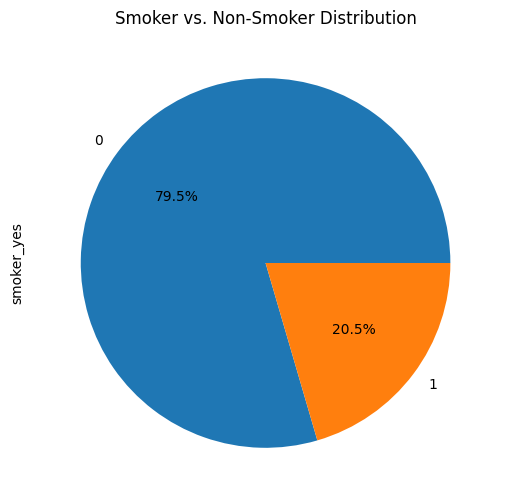

In [7]:
plt.figure(figsize=(8, 6))
df['smoker_yes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

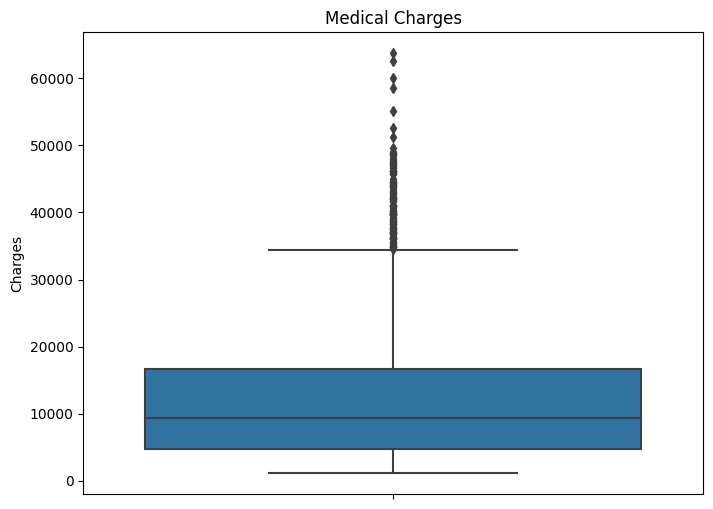

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show()

Using scatter plot to see which may contribute to the charges

In [9]:
c1=alt.Chart(df).mark_circle().encode(
    x='bmi',
    y='charges',
    color='sex_male:N',
)
c1
#This chart show that there isn't obivious relationship for sex at all

alt.Chart(...)

In [10]:
alt.Chart(df).mark_circle().encode(
    x='children:N',
    y='charges',)
#it seems that there are some relationship with children, but not a lot

alt.Chart(...)

In [11]:
alt.Chart(df).mark_circle().encode(
    x='bmi',
    y='charges',
    color='smoker_yes:N',
)
# smokers do generally have a higher charge

alt.Chart(...)

In [12]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('age', scale=alt.Scale(domain=(18,64))),
    y='charges')

#higher age seems have a higher charges, especially the lowest charge for each age

alt.Chart(...)

In [13]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('bmi', scale=alt.Scale(domain=(10,55))),
    y='charges')
# the result show that BMI seems not really important, a higher BMI seems only increase the celling of charge but not floow.

alt.Chart(...)

Generally, from those charts, we can see that all the features seems important but the sex. It seem that sex is not relate to the charges at all for any age group. And smoke contribute the most to the charges. And we will test it using linear regression and decision tree regressor

Read the Correlation map between each variables, this is also a good way to understand the importace. From this map, we know that the thing contribute the most to the charge is also smoker, and age being second. 

<AxesSubplot:>

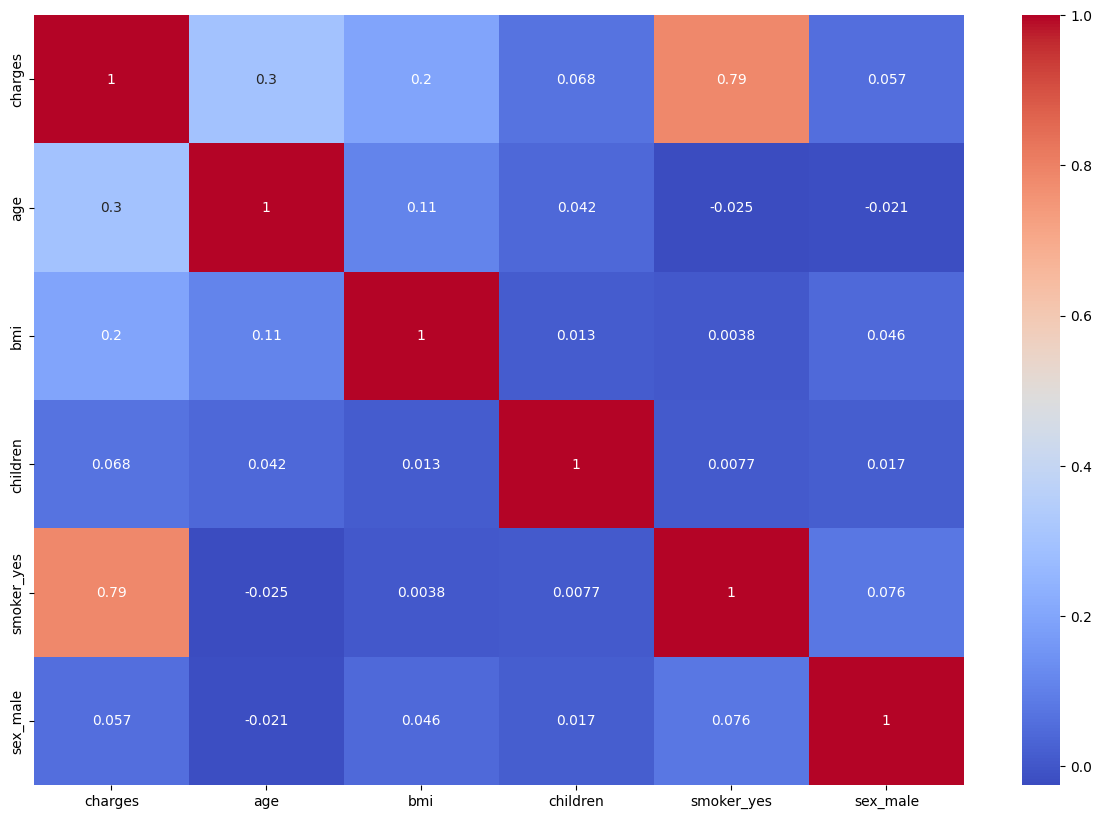

In [14]:
corr_df = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")

## Split the Data for Train and Test

In [15]:
features = ['age','bmi','children','smoker_yes','sex_male']

In [16]:
X = df[features]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

## Linear Regression

In [17]:
reg=LinearRegression()
reg.fit(X_train, y_train)
print('The train score is ' + str(reg.score(X_train, y_train)))
print('The test score is ' + str(reg.score(X_test, y_test)))
print('The score is ' + str(reg.score(df[features], df['charges'])))

The train score is 0.7555272998081446
The test score is 0.7439322852344854
The score is 0.7464160661734538


There is no overfitting for the linear regression

In [18]:
reg_mse_train = mean_squared_error(y_train, reg.predict(X_train))
math.sqrt(reg_mse_train)

6187.598871935761

In [19]:
reg_mse_test = mean_squared_error(y_test, reg.predict(X_test))
math.sqrt(reg_mse_test)

6072.915873685427

In [20]:
df['test'] = df['charges'].mean()
mse_test = mean_squared_error(df['test'],df['charges'])
math.sqrt(mse_test)

12105.484975561612

In [21]:
for name, coef in zip(features, reg.coef_):
    print(name, "=", coef)

age = 245.955948591765
bmi = 383.9550413407004
children = 395.24145654726436
smoker_yes = 24902.795380463333
sex_male = -288.927901059906


The coefficient of regression result seems prove the hypothesis 

## Decision Tree Regressor and MSE

In [22]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=6, min_samples_leaf=10, max_features='sqrt',random_state=10)
dtr.fit(X_train, y_train)
print('The train score is ' + str(dtr.score(X_train, y_train)))
print('The test score is ' + str(dtr.score(X_test, y_test)))
print('The score is ' + str(dtr.score(df[features], df['charges'])))

The train score is 0.7969213149718739
The test score is 0.7649359650091231
The score is 0.7717672349529094


There is no overfitting for the decision tree regressor.

In [23]:
mse_train = mean_squared_error(y_train, dtr.predict(X_train))
math.sqrt(mse_train)

5639.481005734181

In [24]:
mse_test = mean_squared_error(y_test, dtr.predict(X_test))
math.sqrt(mse_test)

5818.525547701853

In [25]:
df['test'] = df['charges'].mean()
mse_test = mean_squared_error(df['test'],df['charges'])
math.sqrt(mse_test)

12105.484975561612

the result of mse also seems good for prediction

In [26]:
plt.figure(figsize=(200,100))
plot_tree(dtr, feature_names=features, filled=True)
plt.show()

See the importance for each parameter

In [27]:
for name, importance in zip(features, dtr.feature_importances_):
    print(name, "=", importance)

age = 0.1492232839167378
bmi = 0.08866239089208457
children = 0.009894399841378665
smoker_yes = 0.7520104207980166
sex_male = 0.00020950455178229155


The coefficient of regression result seems prove the hypothesis 

## Visulization the Result

In [28]:
df['Pred_reg'] = reg.predict(df[features])

In [29]:
df['Pred_dtr']=dtr.predict(df[features])

In [30]:
c1=alt.Chart(df).mark_circle().encode(
    y='charges',
    x='bmi'
)

In [31]:
c2=alt.Chart(df).mark_circle(color='red ').encode(
    y='Pred_reg',
    x='bmi'
)

In [32]:
c3=alt.Chart(df).mark_circle(color='blue').encode(
    y='Pred_dtr',
    x='bmi'
)

In [33]:
c1+c2

alt.LayerChart(...)

In [34]:
c1+c3

alt.LayerChart(...)

## Summary

For this project, I have do the regression and decision tree regressor for the insurance premium on age, children, bmi, smoker and sex. Before I have do the machine learning and the regression, I predicted with chart that age, children are not that important and the smoker is a great contributer to the premium. And the both of the Data have proved my prediction. What's more, the decision tree regressor have a higher R^2 (around 0.81) than linear regression(around 0.75).

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

This dataset is downloaded from Kaggle(https://www.kaggle.com/mirichoi0218/insurance)


* List any other references that you found helpful.

* chatGPT(https://chat.openai.com/) it helps me to understand the deeper on machine learning
* the decision tree regressor details https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
* heatmap from sns package https://seaborn.pydata.org/generated/seaborn.heatmap.html

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=245de7b3-e031-4d3a-9928-e3fbfd620134' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>